import the moudle

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np

Exercise 3.1

<div style="color: green; font-weight: bold">

Very lean and short solution that seems to be correct.

</div>

In [2]:
def omp_regression(X, y, T):
    #initializaition
    m, n = X.shape
    A = []
    residual = y
    beta_head = np.zeros(n)


    for i in range(T):
        inner_products = np.abs(X.T @ residual)
        j = np.argmax(inner_products)

        A.append(j)

        active_matrix_X = X[:, A]

        beta_head[A] = np.linalg.lstsq(active_matrix_X, y, rcond=None)[0]

        residual = y - active_matrix_X @ beta_head[A]

    return beta_head


Exercise 3.2

<div style="color: green; font-weight: bold">

Produced graph does not include training or test errors. Also the activation order is missing. 

</div>

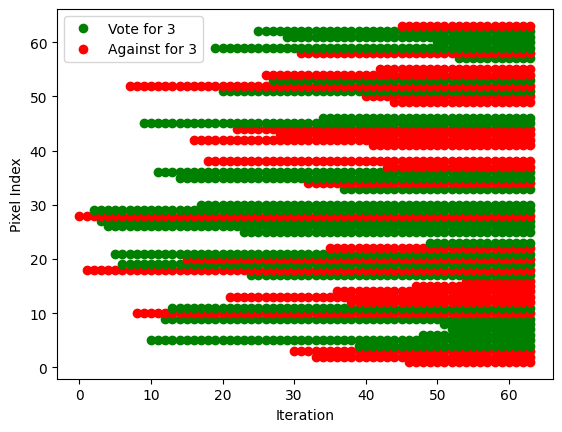

In [3]:
digits = load_digits()

data   = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

digit_3_idx = (target == 3)
digit_9_idx = (target == 9)

data = np.vstack((data[digit_3_idx], data[digit_9_idx]))
target = np.hstack((target[digit_3_idx], target[digit_9_idx]))

X_train, X_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.2, random_state=0)

T = 64
error_rates = []
selected_pixels = []

for t in range(1, T+1):
    beta = omp_regression(X_train, y_train, t)

    # Get the selected pixels with non-zero coefficients
    selected_features = np.nonzero(beta)[0]
    selected_pixels.append(selected_features)

    # Select the corresponding features from the training and test sets
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Create and fit the LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_selected, y_train)

    # Predict the test set labels
    y_pred = lda.predict(X_test_selected)

    # Calculate the error rate
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

acceptable_error_rate = 0.05  # Adjust this threshold as desired
num_pixels_acceptable = next(i for i, error_rate in enumerate(error_rates) if error_rate <= acceptable_error_rate) + 1

fig, ax = plt.subplots()

for t, selected_features in enumerate(selected_pixels):
    for feature in selected_features:
        if y_train[feature] == 3:
            ax.scatter(t, feature, color='green')
        else:
            ax.scatter(t, feature, color='red')

ax.set_xlabel('Iteration')
ax.set_ylabel('Pixel Index')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Vote for 3')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Against for 3')
ax.legend(handles=[green_patch, red_patch])
plt.show()

